In [10]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/5vs5 조합별 승패.csv')

In [4]:
df.drop(['Unnamed: 0','GameID'],1,inplace=True)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_12792\2080031308.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Unnamed: 0','GameID'],1,inplace=True)


In [13]:
if df[Win] == True:
    df[Win] == '블루'

,Win,blue_Offensive_Tank,blue_Defensive_Tank,blue_Juggernaut_Warrior,blue_Mobile_Warrior,blue_Mobile_Assassin,blue_Combat_Assassin,blue_Focused_Mage,blue_Mage,blue_Keeper_Mage,...,red_Juggernaut_Warrior,red_Mobile_Warrior,red_Mobile_Assassin,red_Combat_Assassin,red_Focused_Mage,red_Mage,red_Keeper_Mage,red_Enchantment_Assistant,red_Capture_Assistant,red_Remote_dealer
0,True,0,0,2,0,0,0,1,0,0,...,0,0,0,3,0,1,0,0,0,1
1,False,0,0,1,0,1,0,0,2,0,...,0,0,1,1,1,1,0,0,0,1
2,False,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,3
3,False,0,0,1,1,0,0,1,0,0,...,0,0,0,1,1,1,0,0,0,1
4,True,0,0,1,0,0,0,0,1,0,...,0,2,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,False,1,1,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,1
9933,True,1,0,0,0,1,0,0,0,0,...,0,2,0,1,0,1,0,0,1,0
9934,False,0,0,1,1,0,0,1,0,0,...,0,2,0,0,1,0,0,1,0,1
9935,False,0,0,1,1,1,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('Win',1),df['Win'], random_state=0)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_12792\135159595.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('Win',1),df['Win'], random_state=0)


0.991 0.495
0.754 0.496
0.749 0.495
0.693 0.495
0.683 0.49
0.657 0.484
0.654 0.485
0.637 0.484
0.642 0.493
0.749 0.495


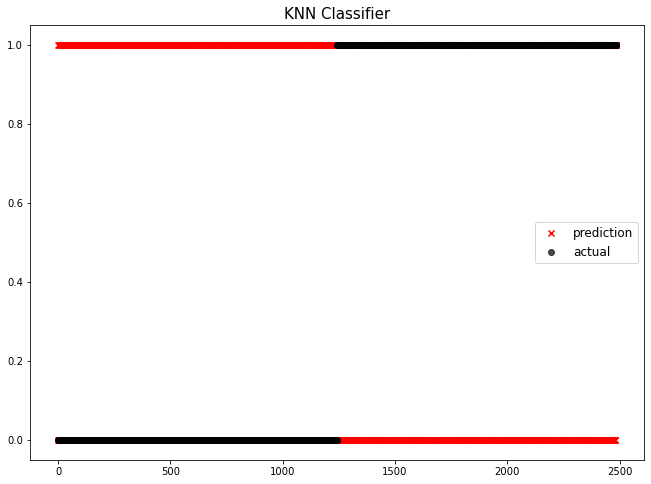

            model        f1
0  KNN Classifier  0.494771


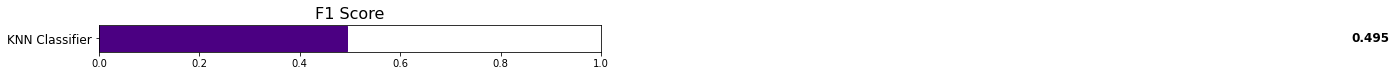

In [11]:
### 모델링 (random_state=0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def f1_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#### knn 파라미터 찾기
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
    # f1_eval(f'KNN Classifier {i}', pred, y_test)
#### 머신러닝 모델 돌려보기
#### hyperparameter 튜닝 전
# KNN classifier (K=3)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
f1_eval('KNN Classifier', pred, y_test)

0.766 0.496


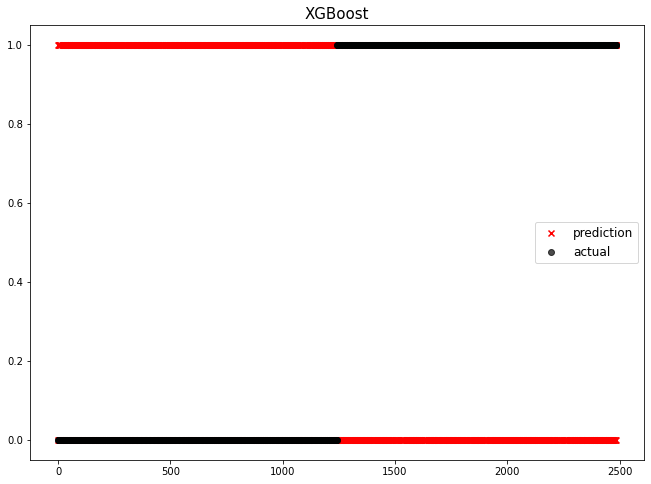

            model        f1
0         XGBoost  0.499000
1  KNN Classifier  0.494771


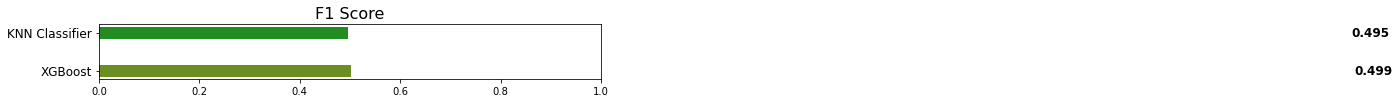

In [12]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(xgb.score(X_train, y_train).round(3), xgb.score(X_test, y_test).round(3))
f1_eval('XGBoost', pred, y_test)

In [14]:
import shap
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


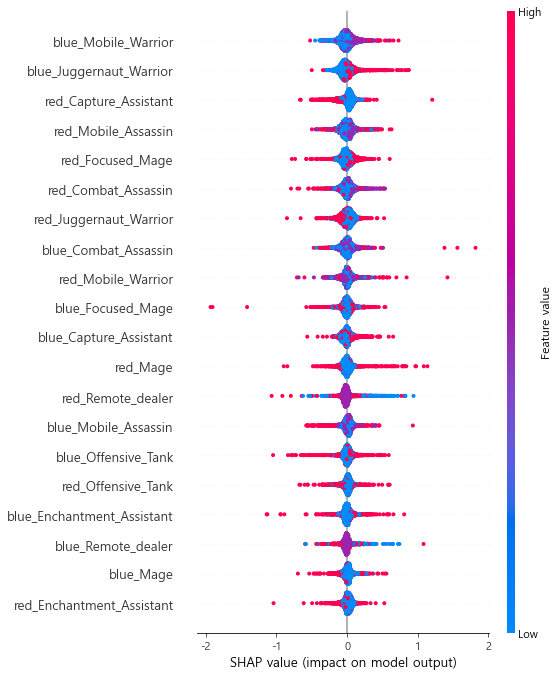

In [15]:
shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)